In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.train import train_model
from src.evaluate import evaluate_model

In [3]:
model, history, test_ds = train_model()

Found 43330 files belonging to 7 classes.
Found 1154 files belonging to 7 classes.
Found 1154 files belonging to 7 classes.
Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.2422 - loss: 1.8360 - val_accuracy: 0.2860 - val_loss: 1.6723 - learning_rate: 0.0010
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.3485 - loss: 1.6389 - val_accuracy: 0.5087 - val_loss: 1.4236 - learning_rate: 0.0010
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4060 - loss: 1.5078 - val_accuracy: 0.5719 - val_loss: 1.1960 - learning_rate: 0.0010
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.4398 - loss: 1.4275 - val_accuracy: 0.5893 - val_loss: 1.1714 - learning_rate: 0.0010
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4598 - loss: 1.3827 - val_accuracy: 0.5685 - val_loss: 1.2259 - learning_rate: 0.0010
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4859 - loss: 1.3299 - val_accuracy: 0.

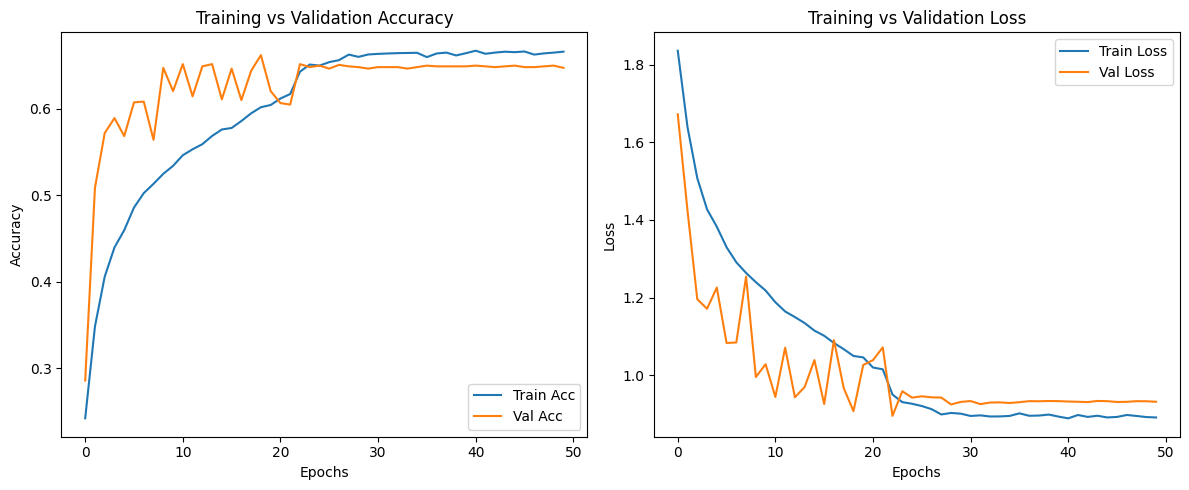

In [4]:
hist = history.history

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(hist["accuracy"], label="Train Acc")
plt.plot(hist["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend(); plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(hist["loss"], label="Train Loss")
plt.plot(hist["val_loss"], label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend(); plt.title("Training vs Validation Loss")

plt.tight_layout()
plt.savefig("outputs/plots/training_curves.png")
plt.show()

In [7]:
evaluate_model("outputs/models/best_model.keras")

Found 43330 files belonging to 7 classes.
Found 1154 files belonging to 7 classes.
Found 1154 files belonging to 7 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report:
               precision    recall  f1-score   support

       akiec       0.23      0.53      0.32        15
         bcc       0.42      0.55      0.48        62
         bkl       0.45      0.56      0.50       134
          df       0.12      0.12      0.12        16
         mel       0.37      0.35      0.36       131
          nv       0.86      0.79      0.82       773
        vasc       0.36      0.35      0.36        23

    accuracy                           0.68      1154
   macro avg       0.40      0.47      0.42      1154
weighted avg       0.71      0.68      0.69      1154

Confusion Matrix:
 [[  8   3   2   0   0   1   1]
 [  3  34  10   1   3   6   5]
 [  6  10  75   2   7  33   1]
 [  1   5   3   2   0   5   0]
 [  3   1  23   0  46  55   3]
 [ 11  22  48  10  66 612   4]
 [  3   5 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


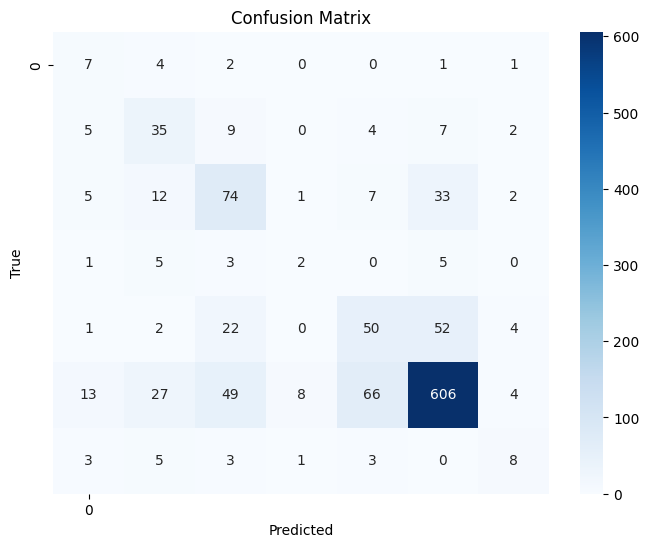

In [8]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

y_true = np.concatenate([y.numpy() for x,y in test_ds], axis=0)
y_probs = model.predict(test_ds)
y_pred = np.argmax(y_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.output_shape[-1],
            yticklabels=model.output_shape[-1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("outputs/plots/confusion_matrix.png")
plt.show()

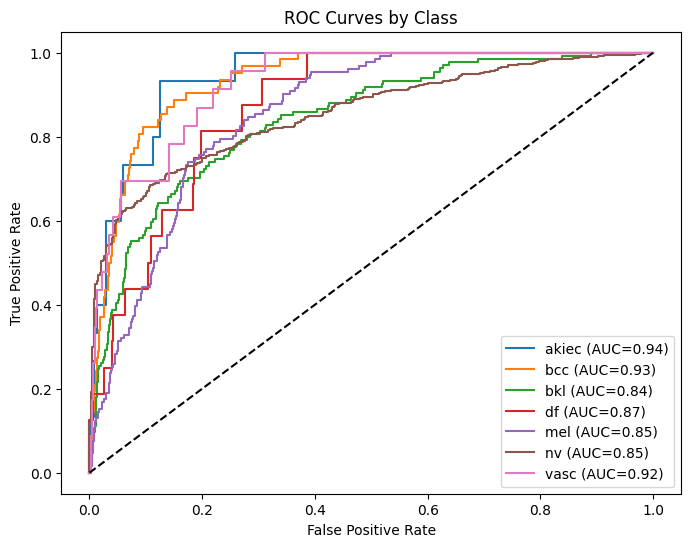

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

CLASSES = ['akiec','bcc','bkl','df','mel','nv','vasc']
y_true_bin = label_binarize(y_true, classes=range(len(CLASSES)))

plt.figure(figsize=(8,6))
for i, cls in enumerate(CLASSES):
    fpr, tpr, _ = roc_curve(y_true_bin[:,i], y_probs[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{cls} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Class")
plt.legend()
plt.savefig("outputs/plots/roc_curves.png")
plt.show()